In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('wine.csv')
data=pd.DataFrame(data=data)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097

In [6]:
data.shape

(1599, 12)

In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

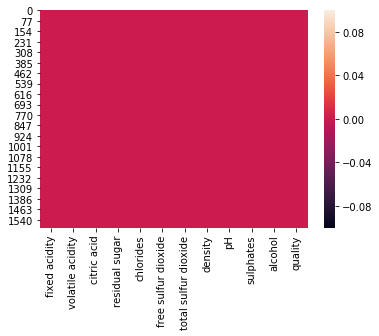

In [8]:
sns.heatmap(data.isnull())

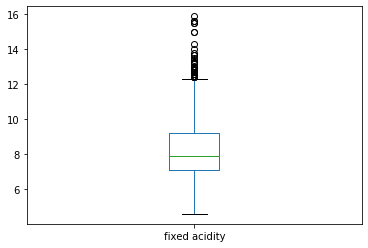

In [9]:
data['fixed acidity'].plot.box()

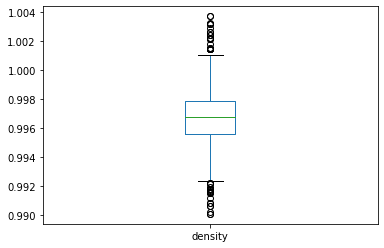

In [10]:
data['density'].plot.box()

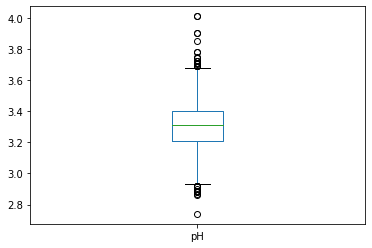

In [11]:
data['pH'].plot.box()

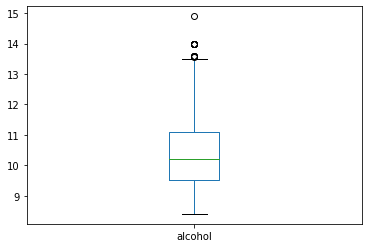

In [12]:
data['alcohol'].plot.box()

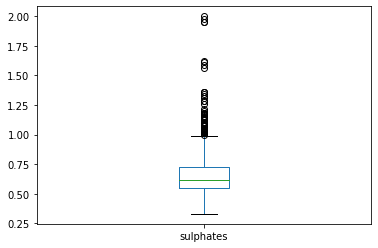

In [13]:
data['sulphates'].plot.box()

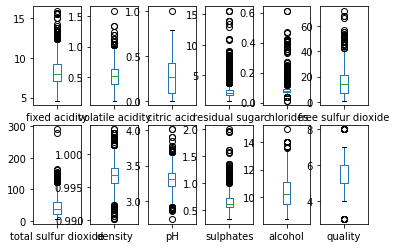

In [14]:
data.plot(kind='box',subplots=True,layout=(2,6))
plt.show()

In [15]:
x=data.iloc[:,0:11]
y=data.iloc[:,-1]

In [16]:
x.shape

(1599, 11)

In [17]:
y.shape

(1599,)

In [18]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.52,random_state=42)

In [19]:
train_x.shape

(767, 11)

In [20]:
test_x.shape

(832, 11)

In [21]:
train_y.shape

(767,)

In [22]:
test_y.shape

(832,)

In [23]:
lg=LogisticRegression()

In [24]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred=lg.predict(test_x)
print(pred)

[5 5 5 5 6 5 5 5 6 6 6 5 6 5 5 6 5 5 6 5 6 5 6 6 5 5 6 5 5 6 5 6 6 5 6 5 6
 6 5 6 5 5 6 5 6 6 6 5 5 6 5 5 6 6 5 5 6 5 6 5 6 6 5 5 6 5 6 5 6 5 6 5 6 6
 6 5 6 6 6 6 5 6 6 6 6 6 5 6 6 5 6 5 6 6 5 6 5 6 5 6 5 5 6 6 6 6 5 5 6 5 6
 5 6 5 6 6 6 5 5 6 6 5 6 5 6 5 6 6 5 6 6 5 5 6 6 5 5 5 5 6 5 6 6 6 6 5 6 6
 6 5 6 6 5 6 6 6 5 6 6 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 5 5 5 5 6 5 6 5
 6 6 6 6 5 6 5 6 6 5 6 5 5 6 6 6 5 6 5 6 6 5 5 6 6 6 5 6 6 6 6 5 5 6 5 5 6
 6 6 5 5 5 6 5 6 5 5 6 6 5 6 6 6 5 5 6 5 6 6 6 5 6 5 6 5 5 6 5 5 5 5 6 6 6
 6 6 6 5 7 6 6 5 5 6 6 5 6 5 5 5 6 6 6 6 5 6 5 6 5 5 6 5 6 5 6 5 6 5 5 5 6
 5 6 6 6 5 5 6 5 5 5 6 6 6 6 6 6 5 5 5 6 5 5 6 5 5 6 6 5 5 5 6 6 5 6 6 6 5
 5 5 6 6 6 5 5 6 6 6 5 5 5 6 5 6 6 6 6 5 5 5 6 5 5 5 6 6 5 6 6 6 6 6 5 5 5
 5 5 6 6 5 6 5 6 5 5 5 6 6 5 6 6 6 5 5 6 6 6 5 5 6 6 6 6 5 6 5 5 6 5 5 6 6
 6 5 5 5 6 6 6 6 6 6 6 6 6 6 5 5 5 6 6 5 5 6 5 6 5 5 5 6 5 5 6 5 6 6 6 6 5
 5 5 5 5 6 6 6 6 6 5 5 6 6 5 6 5 5 5 6 6 6 5 5 5 6 6 6 6 6 6 5 6 6 6 6 5 6
 6 5 6 5 6 6 6 6 5 6 6 5 

In [26]:
print("accuracy score:",accuracy_score(pred,test_y))

accuracy score: 0.546875


In [27]:
print(confusion_matrix(test_y,pred))

[[  0   0   3   1   0   0]
 [  0   0  19   9   0   0]
 [  1   0 263 109   0   0]
 [  0   0 117 192   3   0]
 [  0   0   9  95   0   0]
 [  0   0   0  11   0   0]]


In [28]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        28
           5       0.64      0.71      0.67       373
           6       0.46      0.62      0.53       312
           7       0.00      0.00      0.00       104
           8       0.00      0.00      0.00        11

    accuracy                           0.55       832
   macro avg       0.18      0.22      0.20       832
weighted avg       0.46      0.55      0.50       832



In [29]:
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
predmnb=mnb.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.49038461538461536
[[  2   0   0   1   1   0]
 [  2   0   6  14   6   0]
 [ 10   0 187 129  47   0]
 [  4   0  76 176  56   0]
 [  6   0  12  43  43   0]
 [  0   0   2   3   6   0]]
              precision    recall  f1-score   support

           3       0.08      0.50      0.14         4
           4       0.00      0.00      0.00        28
           5       0.66      0.50      0.57       373
           6       0.48      0.56      0.52       312
           7       0.27      0.41      0.33       104
           8       0.00      0.00      0.00        11

    accuracy                           0.49       832
   macro avg       0.25      0.33      0.26       832
weighted avg       0.51      0.49      0.49       832



In [30]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.49038461538461536
[[  2   0   0   1   1   0]
 [  2   0   6  14   6   0]
 [ 10   0 187 129  47   0]
 [  4   0  76 176  56   0]
 [  6   0  12  43  43   0]
 [  0   0   2   3   6   0]]
              precision    recall  f1-score   support

           3       0.08      0.50      0.14         4
           4       0.00      0.00      0.00        28
           5       0.66      0.50      0.57       373
           6       0.48      0.56      0.52       312
           7       0.27      0.41      0.33       104
           8       0.00      0.00      0.00        11

    accuracy                           0.49       832
   macro avg       0.25      0.33      0.26       832
weighted avg       0.51      0.49      0.49       832



In [31]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.5721153846153846
[[  0   2   2   0   0   0]
 [  1   5  11  10   1   0]
 [  2   6 250 106   7   2]
 [  2   8  84 178  33   7]
 [  0   2  10  45  42   5]
 [  0   0   1   3   6   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.22      0.18      0.20        28
           5       0.70      0.67      0.68       373
           6       0.52      0.57      0.54       312
           7       0.47      0.40      0.44       104
           8       0.07      0.09      0.08        11

    accuracy                           0.57       832
   macro avg       0.33      0.32      0.32       832
weighted avg       0.58      0.57      0.57       832



In [32]:
dtc=KNeighborsClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.49158653846153844
[[  0   0   3   1   0   0]
 [  0   1  11  15   1   0]
 [  0   3 222 144   4   0]
 [  0   1 125 170  16   0]
 [  0   2  27  59  16   0]
 [  0   0   3   6   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.14      0.04      0.06        28
           5       0.57      0.60      0.58       373
           6       0.43      0.54      0.48       312
           7       0.41      0.15      0.22       104
           8       0.00      0.00      0.00        11

    accuracy                           0.49       832
   macro avg       0.26      0.22      0.22       832
weighted avg       0.47      0.49      0.47       832



In [ ]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

In [ ]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

In [ ]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))


In [ ]:
print(auc_score)

In [20]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [21]:
rfr.score(train_x,train_y)

0.8771681425308554

In [22]:
rfr=RandomForestRegressor(n_estimators=100,random_state=46)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

0.9207226445790475

In [23]:
rfr=RandomForestRegressor(n_estimators=400,random_state=56)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

0.9229517536982719

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
gbr=GradientBoostingRegressor(n_estimators=100,random_state=46)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.6998057263257365

In [30]:
gbr=GradientBoostingRegressor(n_estimators=500,random_state=76)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

0.9426338959505398

In [31]:
mnb=MultinomialNB()
score=cross_val_score(mnb,x,y,cv=5)
print("Score:",score)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(mnb,x,y,cv=5)
print('Y prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

Score: [0.50621118 0.43302181 0.42367601 0.3427673  0.43217666]
Mean scores 0.42757059023755384
Std Deviation 0.051849861140390245
Y prediction values
[6 5 5 ... 6 6 6]


0.4277673545966229

In [32]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,x,y,cv=8,scoring='f1_macro')
print('F1-score:',score)
print('Mean Scores',score.mean())
print('standard deviation',score.std())
y_pred=cross_val_predict(mnb,x,y,cv=8)
print('Y prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score: [0.23999168 0.26981594 0.24347458 0.29929921 0.36663855 0.24706447
 0.29054387 0.27045367]
Mean Scores 0.2784102455290211
standard deviation 0.0390256662992621
Y prediction values
[6 5 5 ... 6 6 6]


array([[  2,   0,   2,   2,   4,   0],
       [  2,   0,  13,  21,  17,   0],
       [ 15,   0, 333, 213, 120,   0],
       [ 30,   0, 177, 272, 159,   0],
       [ 21,   0,  24,  69,  85,   0],
       [  1,   0,   3,   5,   9,   0]], dtype=int64)

In [33]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=8,scoring='accuracy')
print("Accuracy Score:",score)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(knn,x,y,cv=10)
print('Y prediction values')
print(y_pred)
print("y_pred.shape",y_pred.shape)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Accuracy Score: [0.408867   0.4950495  0.485      0.47       0.41       0.40201005
 0.40909091 0.42639594]
Mean scores 0.4383016748066058
Std Deviation 0.03603005026954211
Y prediction values
[5 6 5 ... 6 6 6]
y_pred.shape (1599,)


array([[  0,   0,   5,   3,   2,   0],
       [  0,   1,  33,  17,   2,   0],
       [  0,   6, 397, 265,  13,   0],
       [  0,   6, 309, 274,  49,   0],
       [  0,   4,  45, 106,  42,   2],
       [  0,   0,   4,  10,   4,   0]], dtype=int64)

In [34]:
sv=SVC()
score=cross_val_score(sv,x,y,cv=8,scoring='accuracy')
print("Accuracy Score:",score)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(knn,x,y,cv=10)
print('Y prediction values')
print(y_pred)
print("y_pred.shape",y_pred.shape)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

Accuracy Score: [0.47783251 0.55445545 0.515      0.53       0.485      0.48743719
 0.48484848 0.48730964]
Mean scores 0.5027354091635011
Std Deviation 0.02572783313001607
Y prediction values
[5 6 5 ... 6 6 6]
y_pred.shape (1599,)


0.44652908067542213

In [35]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    score=cross_val_score(sv,x,y,cv=8,scoring='accuracy')
    print("Accuracy Score:",score)
    print("Mean scores",score.mean())
    print("Std Deviation",score.std())
    y_pred=cross_val_predict(svc,x,y,cv=10)
    
    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)

In [36]:
svmkernel('rbf')

Accuracy Score: [0.47783251 0.55445545 0.515      0.53       0.485      0.48743719
 0.48484848 0.48730964]
Mean scores 0.5027354091635011
Std Deviation 0.02572783313001607
[[  0   0   8   2   0   0]
 [  0   0  29  22   2   0]
 [  0   2 441 233   5   0]
 [  0   0 285 321  32   0]
 [  0   0  38 122  39   0]
 [  0   0   4  12   2   0]]


In [ ]:
svmkernel('poly')

Accuracy Score: [0.47783251 0.55445545 0.515      0.53       0.485      0.48743719
 0.48484848 0.48730964]
Mean scores 0.5027354091635011
Std Deviation 0.02572783313001607


In [ ]:
svrbf=SVC(kernel='rbf')
score=cross_val_score(svrbf,x,y,cv=8)
print("Mean scores",score.mean())
print("Std Deviation",score.std())
y_pred=cross_val_predict(svrbf,x,y,cv=10)
print('Y prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
print(conf_mat)